**Nama : Grace Natalia**

**Email: gracenatalia2709@gmail.com**

**Github:https://github.com/megumihoshino**

In [1]:
#import library untuk data visualisasi
import pandas as pd
import requests
import numpy as np
import csv
import re
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#import library untuk modelling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Dropout, Conv1D, GlobalMaxPooling1D

#import library utk pemrosesan bahasa
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
import string
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import pandas as pd
clean_df = pd.read_csv('/content/Toped_reviews.csv')
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f77453f4-93d6-4f14-8a6d-fedcd20b7839,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suka sering bug. Saat melakukan pencarian bara...,1,386,3.277.0,2024-09-08 05:16:57,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-09-08 05:20:10,3.277.0
1,ef1c1390-ccb8-4122-9b8f-4b27cc77b17e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia jelek banget. Diskon nya gk ada. Bar...,1,70,3.280.0,2024-09-12 00:33:28,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-09-12 00:40:07,3.280.0
2,292da8b4-5031-401e-b19d-edac387ebd25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Voucher nya suka tiba-tiba gak bisa di pakai,t...",1,200,3.278.0,2024-09-09 16:33:12,"Halo Toppers, terima kasih atas rating yang ka...",2024-09-09 17:00:10,3.278.0
3,575d00d7-2090-42a8-8ffc-6b1056c9d158,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terlalu banyak aturan, masa beli menggunakan a...",1,20,3.279.0,2024-09-12 09:23:47,"Halo Toppers, terima kasih atas rating yang ka...",2024-09-12 09:40:09,3.279.0
4,c0a4ca6e-bfc5-4fd5-a5b7-2f047f74e72e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gara² mitra sama expedisi lambat (ID EXPRESS) ...,1,126,3.279.0,2024-09-09 05:56:58,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-09-09 06:00:27,3.279.0


In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              15000 non-null  object
 1   userName              15000 non-null  object
 2   userImage             15000 non-null  object
 3   content               15000 non-null  object
 4   score                 15000 non-null  int64 
 5   thumbsUpCount         15000 non-null  int64 
 6   reviewCreatedVersion  12577 non-null  object
 7   at                    15000 non-null  object
 8   replyContent          12914 non-null  object
 9   repliedAt             12914 non-null  object
 10  appVersion            12577 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


In [4]:
#DATA CLEANING
def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#[A-Za-z0-9]+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'http?:\/\/\S+', '', text)
  text = re.sub(r'[0-9]+', '', text)
  text = re.sub(r'[^\w\s]', '', text)
  text = text.replace('\n', ' ')
  text = text.translate(str.maketrans('', '', string.punctuation))
  text = text.strip()
  return text

def casefoldingText(text):
  text = text.lower()
  return text

def tokenizingText(text):
  text = word_tokenize(text)
  return text

def filteringText(text):
  listStopwords = set(stopwords.words('indonesian'))
  listStopwords1 = set(stopwords.words('english'))
  listStopwords.update(listStopwords1)
  listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","aph"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = filtered
  return text

def stemmingText(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  stemmed_text = ' '.join(stemmed_words)
  return stemmed_text

def toSentence(list_words):
  sentence = ' '.join(word for word in list_words)
  return sentence

In [5]:
#PREPROCESSING DATA

clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_tokenizingText'] = clean_df['text_casefoldingText'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir
0,f77453f4-93d6-4f14-8a6d-fedcd20b7839,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Suka sering bug. Saat melakukan pencarian bara...,1,386,3.277.0,2024-09-08 05:16:57,"Hi Toppers, silakan sampaikan kritik/saran ata...",2024-09-08 05:20:10,3.277.0,Suka sering bug Saat melakukan pencarian baran...,suka sering bug saat melakukan pencarian baran...,"[suka, sering, bug, saat, melakukan, pencarian...","[suka, bug, pencarian, barang, toko, barangnya...",suka bug pencarian barang toko barangnya perja...
1,ef1c1390-ccb8-4122-9b8f-4b27cc77b17e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tokopedia jelek banget. Diskon nya gk ada. Bar...,1,70,3.280.0,2024-09-12 00:33:28,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-09-12 00:40:07,3.280.0,Tokopedia jelek banget Diskon nya gk ada Baran...,tokopedia jelek banget diskon nya gk ada baran...,"[tokopedia, jelek, banget, diskon, nya, gk, ad...","[tokopedia, jelek, banget, diskon, gk, barang,...",tokopedia jelek banget diskon gk barang yg dij...
2,292da8b4-5031-401e-b19d-edac387ebd25,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Voucher nya suka tiba-tiba gak bisa di pakai,t...",1,200,3.278.0,2024-09-09 16:33:12,"Halo Toppers, terima kasih atas rating yang ka...",2024-09-09 17:00:10,3.278.0,Voucher nya suka tibatiba gak bisa di pakaiter...,voucher nya suka tibatiba gak bisa di pakaiter...,"[voucher, nya, suka, tibatiba, gak, bisa, di, ...","[voucher, suka, tibatiba, pakaiterus, kadang, ...",voucher suka tibatiba pakaiterus kadang barang...
3,575d00d7-2090-42a8-8ffc-6b1056c9d158,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Terlalu banyak aturan, masa beli menggunakan a...",1,20,3.279.0,2024-09-12 09:23:47,"Halo Toppers, terima kasih atas rating yang ka...",2024-09-12 09:40:09,3.279.0,Terlalu banyak aturan masa beli menggunakan ak...,terlalu banyak aturan masa beli menggunakan ak...,"[terlalu, banyak, aturan, masa, beli, mengguna...","[aturan, beli, akun, dibatalkan, sistem, jelas...",aturan beli akun dibatalkan sistem jelas² hand...
4,c0a4ca6e-bfc5-4fd5-a5b7-2f047f74e72e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Gara² mitra sama expedisi lambat (ID EXPRESS) ...,1,126,3.279.0,2024-09-09 05:56:58,"Toppers, mohon maaf atas kendala yang kamu ala...",2024-09-09 06:00:27,3.279.0,Gara² mitra sama expedisi lambat ID EXPRESS ja...,gara² mitra sama expedisi lambat id express ja...,"[gara², mitra, sama, expedisi, lambat, id, exp...","[gara², mitra, expedisi, lambat, id, express, ...",gara² mitra expedisi lambat id express male be...


In [6]:
#ANALISIS SENTIMENT POSITIF DAN NEGATIF

#MEMBACA KATA-KATA POSITIF DARI GITHUB
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter = ',')
  for row in reader:
    lexicon_positive[row[0]] = int(row[1])
else:
  print('failed to fetch positive lexicon data')

#MEMBACA LEXICON NEGATIVE DARI GITHUB
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter = ',')
  for row in reader:
    lexicon_negative[row[0]] = int(row[1])
else:
  print('failed to fetch negative lexicon data')

In [7]:
#ANALISIS POLARITAS

def sentiment_analysis_lexicon_indonesia(text):
  score = 0
  for word in text:
    if(word in lexicon_positive):
      score = score + lexicon_positive[word]

  for word in text:
    if(word in lexicon_negative):
      score = score + lexicon_negative[word]

  polarity = ''

  if (score > 0):
    polarity = 'positive'

  elif (score < 0):
    polarity = 'negative'

  else:
    polarity = 'neutral'

  return score, polarity

In [8]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    7306
positive    6874
neutral      820
Name: count, dtype: int64


**EKSPLORASI LABEL**

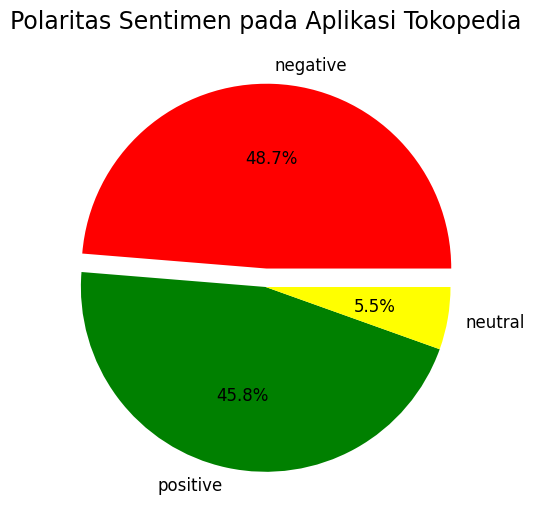

In [9]:
#PLOTTING TIAP POLARITAS SENTIMEN

fig, ax = plt.subplots(figsize = (6,6))
sizes = [count for count in clean_df['polarity'].value_counts()]
labels = list(clean_df['polarity'].value_counts().index)

explode = (0.1, 0, 0)
ax.pie(x = sizes, labels = labels, autopct= '%1.1f%%', explode = explode, textprops = {'fontsize': 12}, colors = ['red', 'green', 'yellow'])
ax.set_title('Polaritas Sentimen pada Aplikasi Tokopedia', fontsize = 17, pad = 20)
plt.show()


In [10]:
#MEMBUAT WORDCLOUD TIAP POLARITY

#1. ULASAN POSITIF
pd.set_option('display.max_colwidth', 3000)

ulasan_positif = clean_df[clean_df['polarity'] == 'positive']
ulasan_positif = ulasan_positif[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
ulasan_positif = ulasan_positif.sort_values(by = 'polarity_score', ascending = False)
ulasan_positif = ulasan_positif.reset_index(drop = True)
ulasan_positif.index +=1

#2. ULASAN NEGATIVE
ulasan_negatif = clean_df[clean_df['polarity'] == 'negative']
ulasan_negatif = ulasan_negatif[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
ulasan_negatif = ulasan_negatif.sort_values(by = 'polarity_score', ascending = True)
ulasan_negatif = ulasan_negatif[0:10]
ulasan_negatif = ulasan_negatif.reset_index(drop = True)
ulasan_negatif.index +=1

#3. ULASAN NEUTRAL
ulasan_netral = clean_df[clean_df['polarity'] == 'neutral']
ulasan_netral = ulasan_netral[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]
ulasan_netral = ulasan_netral.sort_values(by = 'polarity_score', key = abs, ascending = True)
ulasan_netral = ulasan_netral[0:10]
ulasan_netral = ulasan_netral.reset_index(drop = True)
ulasan_netral.index +=1


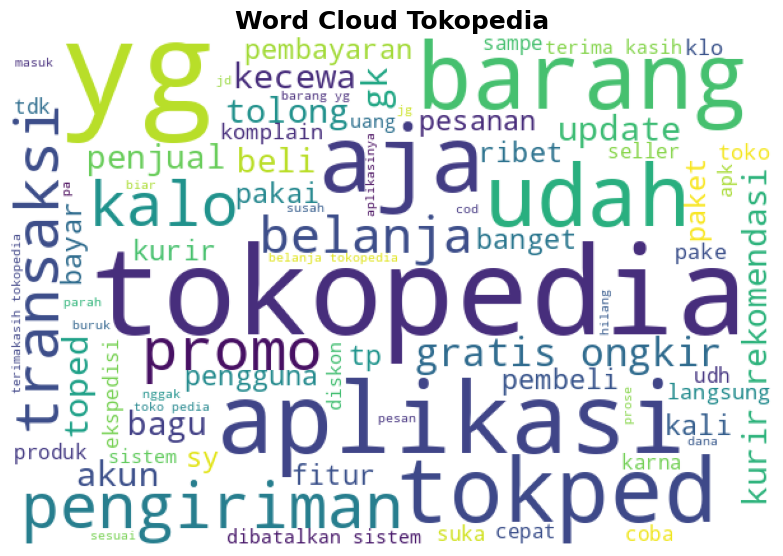

In [11]:
#WORDCLOUD

list_words = ''

for tweet in clean_df['text_stopword']:
  for word in tweet:
    list_words +=' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title("Word Cloud Tokopedia", fontsize = 18, fontweight = 'bold')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad = 0)
ax.axis('off')
plt.show()

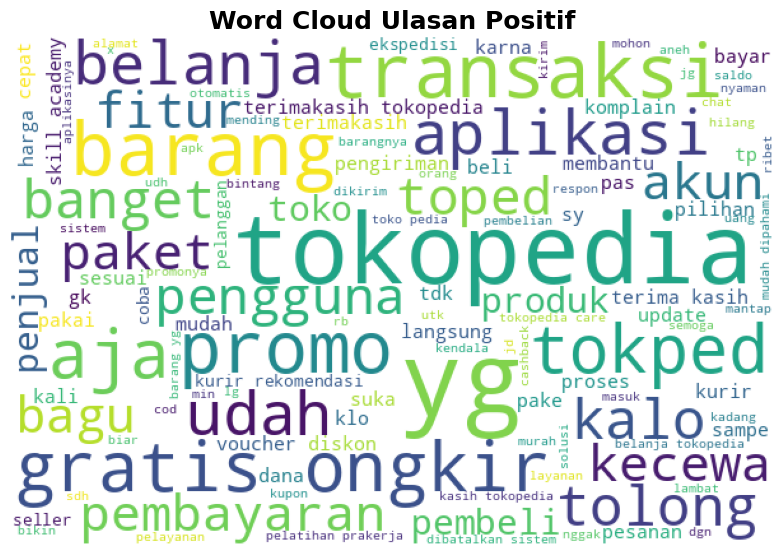

In [12]:
#WORDCLOUD ULASAN POSITIF
list_words = ''

for tweet in ulasan_positif['text_stopword']:
  for word in tweet:
    list_words +=' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title("Word Cloud Ulasan Positif", fontsize = 18, fontweight = 'bold')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad = 0)
ax.axis('off')
plt.show()

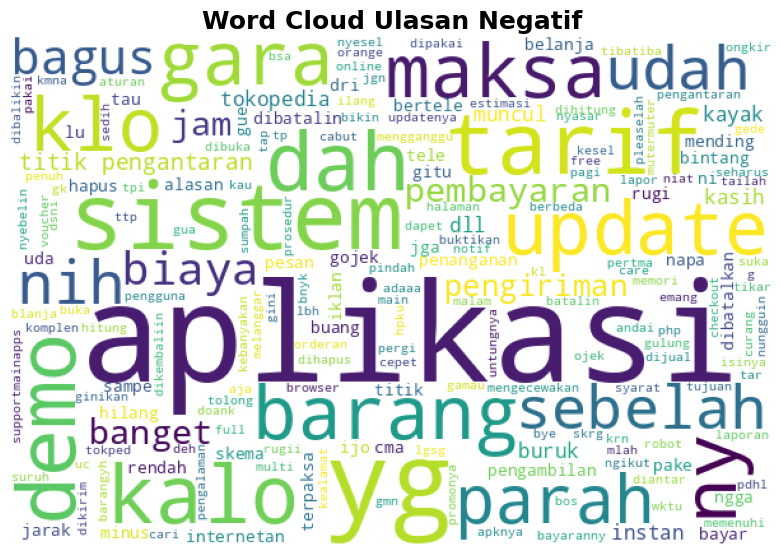

In [13]:
#ULASAN NEGATIF
list_words = ''

for tweet in ulasan_negatif['text_stopword']:
  for word in tweet:
    list_words +=' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title("Word Cloud Ulasan Negatif", fontsize = 18, fontweight = 'bold')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad = 0)
ax.axis('off')
plt.show()

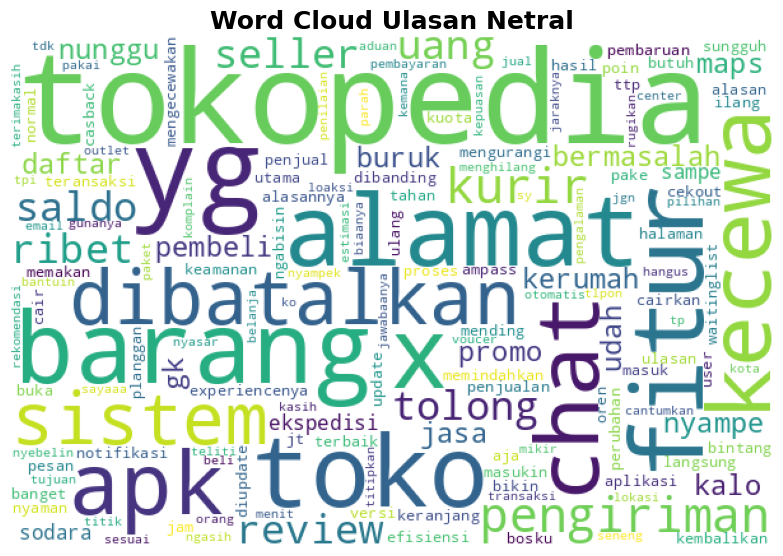

In [14]:
#ULASAN NEUTRAL
list_words = ''

for tweet in ulasan_netral['text_stopword']:
  for word in tweet:
    list_words +=' '+(word)

wordcloud = WordCloud(width = 600, height = 400, background_color = 'white', min_font_size = 10).generate(list_words)
fig, ax = plt.subplots(figsize = (8,6))
ax.set_title("Word Cloud Ulasan Netral", fontsize = 18, fontweight = 'bold')
ax.grid(False)
ax.imshow((wordcloud))
fig.tight_layout(pad = 0)
ax.axis('off')
plt.show()

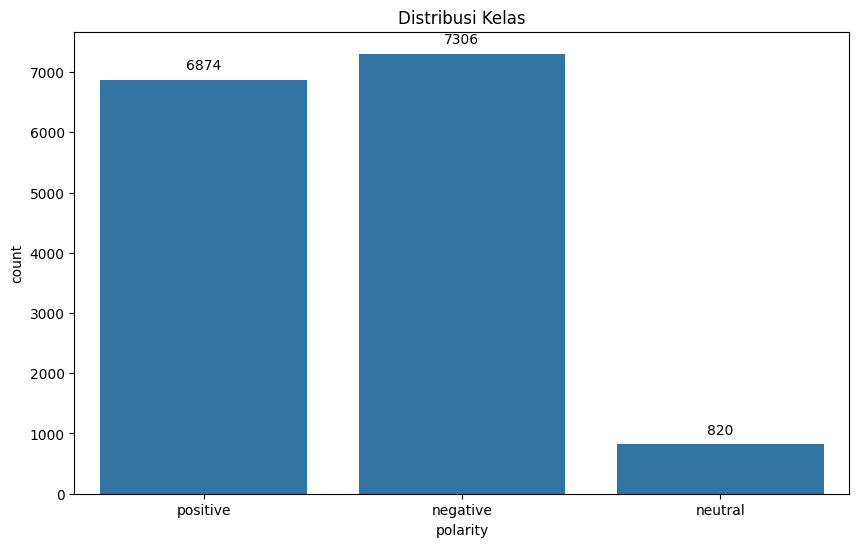

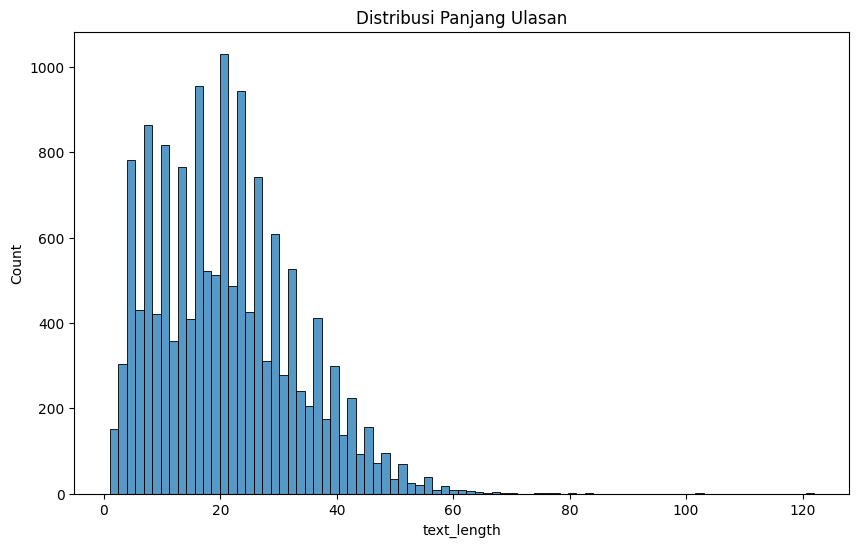

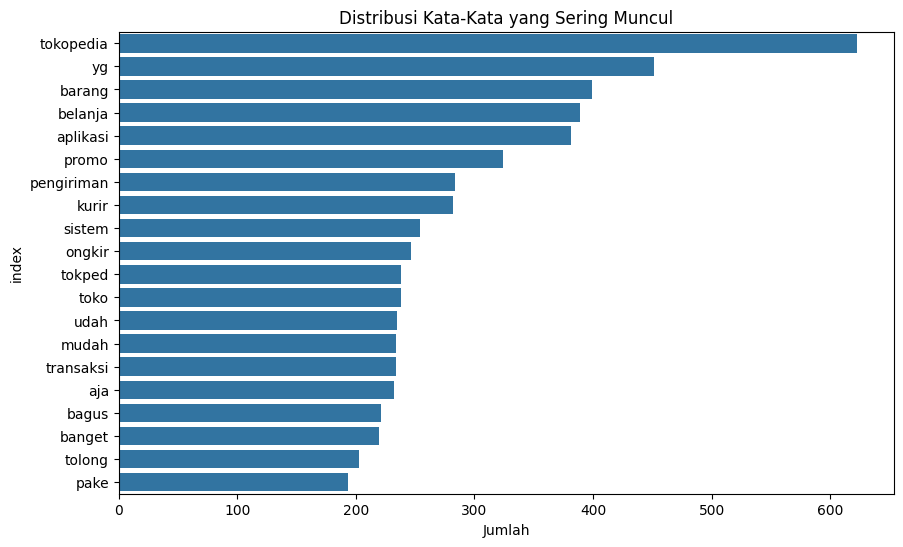

In [15]:
#DISTRIBUSI KELAS POLARITAS APLIKASI TOKOPEDIA

plt.figure(figsize = (10,6))

class_dist_plot = sns.countplot(x = 'polarity', data = clean_df)
plt.title('Distribusi Kelas')


#LABEL ANGKA DI ATAS BATANG COUNTPLOT
for p in class_dist_plot.patches:
  class_dist_plot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width()/2., p.get_height()),
                           ha = 'center', va = 'center',
                           xytext = (0,10),
                           textcoords = 'offset points')
plt.show()


#VISUALISASI PANJANG ULASAN
plt.figure(figsize = (10,6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Distribusi Panjang Ulasan')
plt.show()


#DISTRIBUSI KATA2 YG SERING MUNCUL
plt.figure(figsize = (10,6))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name = 'Jumlah')
tfidf_df = tfidf_df.sort_values('Jumlah', ascending = False).head(20)
sns.barplot(x = 'Jumlah', y = 'index', data = tfidf_df)
plt.title('Distribusi Kata-Kata yang Sering Muncul')
plt.show()

In [16]:
clean_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,f77453f4-93d6-4f14-8a6d-fedcd20b7839,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Suka sering bug. Saat melakukan pencarian barang di suatu toko yang banyak barangnya. Ketika sudah di tengah2 perjalanan tiba-tiba blank putih tidak merespon sama sekali. Kecuali harus di close aplikasi nya. Dan pencarian pun dimulai lagi dari awal. Menjengkelkan. Lalu untuk voucher promo yang 50 persen MUSTAHIL didapatkan. Dengan alasan habis. Padahal baru beberapa detik. itu hanya promo gimick. Lebih baik dihilangkan saja tuh promo. Bikin kecewa saja.,1,386,3.277.0,2024-09-08 05:16:57,"Hi Toppers, silakan sampaikan kritik/saran atau kendala transaksi kamu dengan menghubungi Tokopedia Care melalui Di Mana Saya Dapat Menghubungi Tokopedia? | Tokopedia Care agar bisa kami bantu cek lebih lanjut. Kami akan terus berupaya untuk meningkatkan pengalaman Toppers dalam bertransaksi di Tokopedia.",2024-09-08 05:20:10,3.277.0,Suka sering bug Saat melakukan pencarian barang di suatu toko yang banyak barangnya Ketika sudah di tengah perjalanan tibatiba blank putih tidak merespon sama sekali Kecuali harus di close aplikasi nya Dan pencarian pun dimulai lagi dari awal Menjengkelkan Lalu untuk voucher promo yang persen MUSTAHIL didapatkan Dengan alasan habis Padahal baru beberapa detik itu hanya promo gimick Lebih baik dihilangkan saja tuh promo Bikin kecewa saja,suka sering bug saat melakukan pencarian barang di suatu toko yang banyak barangnya ketika sudah di tengah perjalanan tibatiba blank putih tidak merespon sama sekali kecuali harus di close aplikasi nya dan pencarian pun dimulai lagi dari awal menjengkelkan lalu untuk voucher promo yang persen mustahil didapatkan dengan alasan habis padahal baru beberapa detik itu hanya promo gimick lebih baik dihilangkan saja tuh promo bikin kecewa saja,"[suka, sering, bug, saat, melakukan, pencarian, barang, di, suatu, toko, yang, banyak, barangnya, ketika, sudah, di, tengah, perjalanan, tibatiba, blank, putih, tidak, merespon, sama, sekali, kecuali, harus, di, close, aplikasi, nya, dan, pencarian, pun, dimulai, lagi, dari, awal, menjengkelkan, lalu, untuk, voucher, promo, yang, persen, mustahil, didapatkan, dengan, alasan, habis, padahal, baru, beberapa, detik, itu, hanya, promo, gimick, lebih, baik, dihilangkan, saja, tuh, promo, bikin, kecewa, saja]","[suka, bug, pencarian, barang, toko, barangnya, perjalanan, tibatiba, blank, putih, merespon, kecuali, close, aplikasi, pencarian, menjengkelkan, voucher, promo, persen, mustahil, didapatkan, alasan, habis, detik, promo, gimick, dihilangkan, tuh, promo, bikin, kecewa]",suka bug pencarian barang toko barangnya perjalanan tibatiba blank putih merespon kecuali close aplikasi pencarian menjengkelkan voucher promo persen mustahil didapatkan alasan habis detik promo gimick dihilangkan tuh promo bikin kecewa,10,positive,31
1,ef1c1390-ccb8-4122-9b8f-4b27cc77b17e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Tokopedia jelek banget. Diskon nya gk ada. Barang yg dijual mahal, banyak biaya penangananya. Giliran ada kendala pengiriman ngajuin komplain lama banget penangananya, padahal saya beli barang karna butuh. Tp lama banget proses nya.. udah gitu gk ngasih info kontak kurir, kasih lah kontak nya jgn cuma nama nya aja, biar kita pelanggan langsung bisa nanya ke kurir nya. Kalau ada bintang minus udah saya kasih minus 1000",1,70,3.280.0,2024-09-12 00:33:28,"Toppers, mohon maaf atas kendala yang kamu alami. Silakan sampaikan kritik/saran atau kendala transaksi kamu dengan menghubungi Tokopedia Care di tkp.me/supportMainapps untuk dicek lebih lanjut. Kami akan terus mening

In [17]:
#MEMISAHKAN DATA MENJADI FITUR DAN LABEL
X  = clean_df['text_akhir']
y = clean_df['polarity']

In [18]:
#EKTRAKSI FITUR DENGAN TF-IDF
tfidf = TfidfVectorizer(max_features = 200, min_df = 17, max_df = 0.8)
X_tfidf = tfidf.fit_transform(X)

In [19]:
#CONVERT HASIL EKSTRAKSI KE BTK DATAFRAME
features_df = pd.DataFrame(X_tfidf.toarray(), columns = tfidf.get_feature_names_out())
features_df

,academy,aja,akun,alamat,alasan,aneh,apk,aplikasi,aplikasinya,app,...,trus,uang,udah,udh,ulasan,update,utk,versi,voucher,yg
0,0.0,0.000000,0.000000,0.000000,0.254970,0.0,0.0,0.143988,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.215367,0.000000
1,0.0,0.118698,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.246553,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.092533
2,0.0,0.128164,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.18521,0.000000,0.0,0.0,0.0,0.653396,0.099912
3,0.0,0.000000,0.402089,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.198818,0.000000
4,0.0,0.000000,0.000000,0.342779,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.364526,0.311394,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
14996,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.529476,0.0,0.0,0.0,0.000000,0.000000
14997,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000
14998,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.218185,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [20]:
#TOKENIZING AND PADDING

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(clean_df['text_akhir'])
X = tokenizer.texts_to_sequences(clean_df['text_akhir'])
X = pad_sequences(X, maxlen = 100)
y = pd.get_dummies(clean_df['polarity']).values

In [21]:
#SPLIT DATA KE TRAIN DATA DAN TEST DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [22]:
#MODEL LSTM
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim = 5000, output_dim = 128))
lstm_model.add(LSTM(128, return_sequences = True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(3, activation = 'softmax'))

lstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [23]:
#TRAINING
history_LSTM = lstm_model.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_data = (X_test, y_test))

#EVALUASI
test_loss, test_accuracy = lstm_model.evaluate(X_test, y_test)
train_loss, train_accuracy = lstm_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 536ms/step - accuracy: 0.6019 - loss: 0.7940 - val_accuracy: 0.8417 - val_loss: 0.4303
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 543ms/step - accuracy: 0.8843 - loss: 0.3277 - val_accuracy: 0.8513 - val_loss: 0.4000
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 539ms/step - accuracy: 0.9203 - loss: 0.2224 - val_accuracy: 0.8663 - val_loss: 0.4135
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 143s 542ms/step - accuracy: 0.9340 - loss: 0.1788 - val_accuracy: 0.8660 - val_loss: 0.4292
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 531ms/step - accuracy: 0.9552 - loss: 0.1309 - val_accuracy: 0.8523 - val_loss: 0.5098
94/94 ━━━━━━━━━━━━━━━━━━━━ 10s 102ms/step - accuracy: 0.8564 - loss: 0.4978
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - accuracy: 0.9678 - loss: 0.0947
Test Loss: 0.5097647905349731, Test Accuracy: 0.8523333072662354
Train Loss: 0.09755632281303406, Train Accuracy: 0.965666651725769


In [25]:
#TRAINING GRU
gru_model = Sequential()
gru_model.add(Embedding(input_dim = 5000, output_dim = 128, input_length = 100))
gru_model.add(GRU(128, return_sequences = False))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(128, activation = 'relu'))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(3, activation = 'softmax'))

gru_model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',  metrics = ['accuracy'])


In [26]:
#MODEL TRAINING
history_GRU = gru_model.fit(X_train, y_train, epochs = 5, batch_size = 64, validation_data = (X_test, y_test))

#MODEL EVALUASI
test_loss, test_accuracy = gru_model.evaluate(X_test, y_test)
train_loss, train_accuracy = gru_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

Epoch 1/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 58s 287ms/step - accuracy: 0.5615 - loss: 0.8504 - val_accuracy: 0.8313 - val_loss: 0.4321
Epoch 2/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 288ms/step - accuracy: 0.8822 - loss: 0.3292 - val_accuracy: 0.8597 - val_loss: 0.3647
Epoch 3/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 84s 299ms/step - accuracy: 0.9243 - loss: 0.2193 - val_accuracy: 0.8653 - val_loss: 0.3942
Epoch 4/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 305ms/step - accuracy: 0.9432 - loss: 0.1611 - val_accuracy: 0.8557 - val_loss: 0.4517
Epoch 5/5
188/188 ━━━━━━━━━━━━━━━━━━━━ 79s 290ms/step - accuracy: 0.9552 - loss: 0.1294 - val_accuracy: 0.8217 - val_loss: 0.6706
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8192 - loss: 0.6740
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9128 - loss: 0.2247
Test Loss: 0.6705788373947144, Test Accuracy: 0.8216666579246521
Train Loss: 0.23622889816761017, Train Accuracy: 0.9120833277702332


In [27]:
X = clean_df['text_akhir'].values
y = clean_df['polarity'].values

In [28]:
#LABEL ENCODER
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

tokenizer = Tokenizer(num_words = 5000)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

X_padded = pad_sequences(X_sequences, maxlen = 100)

In [29]:
#SPLIT
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size = 0.3, random_state = 42)

In [30]:
#CNN MODELLING

cnn_model = Sequential()
cnn_model.add(Embedding(input_dim = 5000, output_dim = 128))
cnn_model.add(Conv1D(filters = 128, kernel_size = 5, activation = 'relu'))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(3, activation = 'softmax'))

cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [31]:
history_CNN = cnn_model.fit(X_train, y_train, epochs = 4, batch_size = 64, validation_data = (X_test, y_test))

test_loss, tes_accuracy = cnn_model.evaluate(X_test, y_test)
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')
print(f'Train Loss: {train_loss}, Train Accuracy: {train_accuracy}')

Epoch 1/4
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.5790 - loss: 0.8337 - val_accuracy: 0.8109 - val_loss: 0.4858
Epoch 2/4
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.8545 - loss: 0.4026 - val_accuracy: 0.8216 - val_loss: 0.4478
Epoch 3/4
165/165 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.9084 - loss: 0.2680 - val_accuracy: 0.8280 - val_loss: 0.4985
Epoch 4/4
165/165 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step - accuracy: 0.9295 - loss: 0.2033 - val_accuracy: 0.8287 - val_loss: 0.5373
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8296 - loss: 0.5551
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9541 - loss: 0.1314
Test Loss: 0.53727126121521, Test Accuracy: 0.8216666579246521
Train Loss: 0.12610310316085815, Train Accuracy: 0.9569523930549622


In [32]:
#PLOTTING LSTM MODEL (TRAINING ACCURACY VS TESTING ACCURACY)
def plot_accuracy(history, model_name):
  plt.figure(figsize = (10, 6))
  plt.plot(history.history['accuracy'], label = f'{model_name} Training Accuracy')
  plt.plot(history.history['val_accuracy'], label = f'{model_name} Validation Accuracy')
  plt.title(f'{model_name} Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

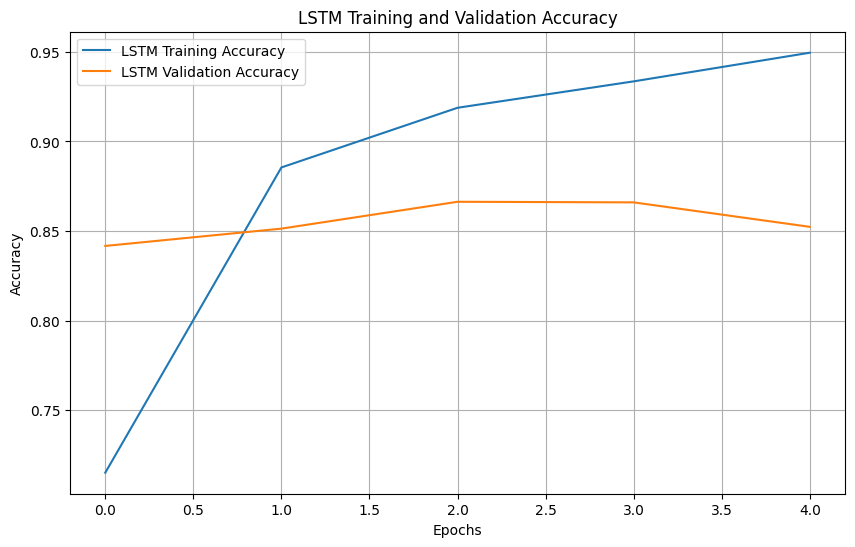

In [33]:
plot_accuracy(history_LSTM, 'LSTM')

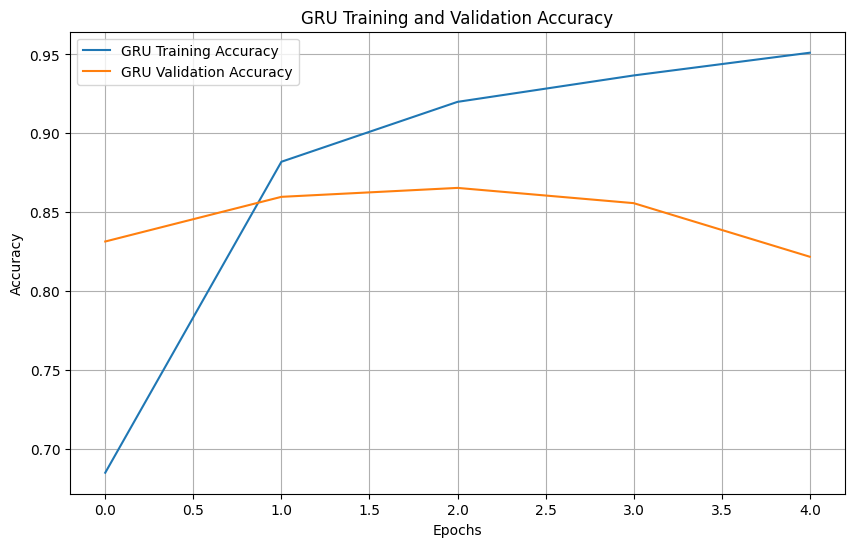

In [34]:
plot_accuracy(history_GRU, 'GRU')

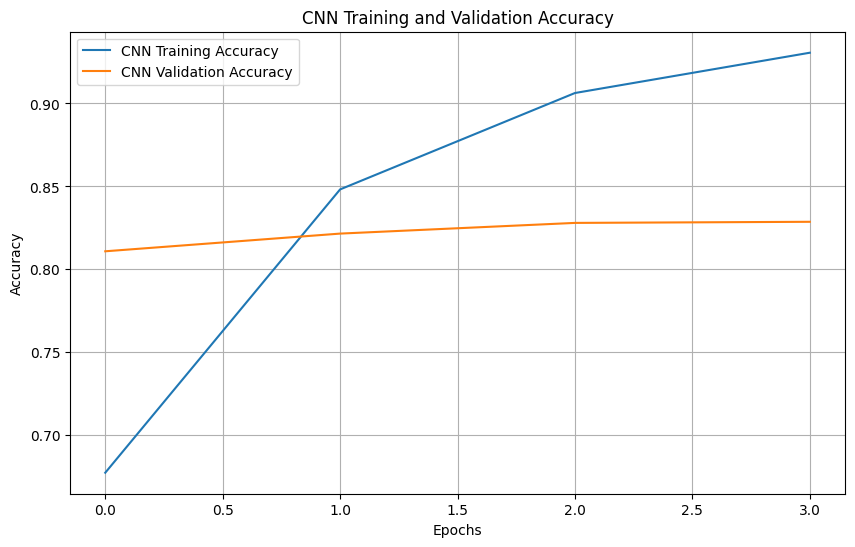

In [35]:
plot_accuracy(history_CNN, 'CNN')

In [36]:
#ALGORITMA NAIVE-BAYES, RANDOM FOREST, LOGISTIC REGRESSION

def extract_features(model, X_data):
  feature_extractor = Sequential(model.layers[:-1])
  return feature_extractor.predict(X_data)

#LSTM
X_train_lstm = extract_features(lstm_model, X_train)
X_test_lstm = extract_features(lstm_model, X_test)

#GRU
X_train_gru = extract_features(gru_model, X_train)
X_test_gru = extract_features(gru_model, X_test)

#CNN
X_train_cnn = extract_features(cnn_model, X_train)
X_test_cnn = extract_features(cnn_model, X_test)

#KOMBINASI KETIGA ARCHITECTURE
X_train_combined = np.concatenate([X_train_lstm, X_train_gru, X_train_cnn], axis = 1)
X_test_combined = np.concatenate([X_test_lstm, X_test_gru, X_test_cnn], axis = 1)

#MINMAXSCALER
scaler = MinMaxScaler()
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

classifiers = {
    'naive_bayes' : MultinomialNB(),
    'random_forest': RandomForestClassifier(),
    'logistic_regression': LogisticRegression(max_iter = 1000)
}


for name, classifier in classifiers.items():
  classifier.fit(X_train_combined, y_train)
  y_pred_train = classifier.predict(X_train_combined)
  y_pred_test = classifier.predict(X_test_combined)

  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  print(f'{name} Training Accuracy: {accuracy_train*100:.2f}%')
  print(f'{name} Test Accuracy: {accuracy_test*100:.2f}%')


329/329 ━━━━━━━━━━━━━━━━━━━━ 40s 119ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 18s 128ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
naive_bayes Training Accuracy: 96.05%
naive_bayes Test Accuracy: 81.64%
random_forest Training Accuracy: 100.00%
random_forest Test Accuracy: 87.40%
logistic_regression Training Accuracy: 99.38%
logistic_regression Test Accuracy: 88.11%


In [38]:
#SENTIMENT ANALYSIS TESTS

input_sentence= input("Masukkan kalimat: ")

#proses cleaning, tokenisasi, dan preprosesing kalimat
def preprocess_input(text):
  text = cleaningText(text)
  text = casefoldingText(text)
  text = tokenizingText(text)
  text = filteringText(text)
  text = toSentence(text)
  return text

pre_sentence = preprocess_input(input_sentence)

#tokenisasi and padding
sequence = tokenizer.texts_to_sequences([pre_sentence])
padded_sequence = pad_sequences(sequence, maxlen = 100)

#predicting with using LSTM, GRU, and CNN
lstm_predicted = lstm_model.predict(padded_sequence)
gru_predicted = gru_model.predict(padded_sequence)
cnn_predicted = cnn_model.predict(padded_sequence)

#kombinasikan ketiga model
combined_features = np.concatenate([
    extract_features(lstm_model, padded_sequence),
    extract_features(gru_model, padded_sequence),
    extract_features(cnn_model, padded_sequence)
], axis = 1)

scale_features = scaler.transform(combined_features)

#prediksi sentimen analisis
nb_prediction = classifiers['naive_bayes'].predict(scale_features)
rf_prediction = classifiers['random_forest'].predict(scale_features)
lr_prediction = classifiers['logistic_regression'].predict(scale_features)

nb_sentiment = label_encoder.inverse_transform(nb_prediction)
rf_sentiment = label_encoder.inverse_transform(rf_prediction)
lr_sentiment = label_encoder.inverse_transform(lr_prediction)

print(f'Naive-Bayes Sentiment Results:{nb_sentiment[0]}')
print(f'Random Forest Sentiment Results: {rf_sentiment[0]}')
print(f'Logistic Regression Sentiment Results: {lr_sentiment[0]}')


Masukkan kalimat: bermanfaat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Naive-Bayes Sentiment Results:positive
Random Forest Sentiment Results: positive
Logistic Regression Sentiment Results: positive


In [39]:
!pip freeze >> requirements.txt

In [ ]:
!cp requirements.txt /content/requirements.txt